In [724]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

import hdbscan

from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(transform_output="pandas")

In [810]:
df_all_temp_dummies_cut_build_param = pd.read_csv('df_all_temp_dummies_cut_build_param.csv')

df_all_temp_dummies_cut_build_param.columns

Index(['Адрес объекта', 'dt', '№ ОДПУ', 'Тип объекта',
       'Дата текущего показания', 'Текущее потребление, Гкал', 'avg_temp',
       'days', 'ГВС-ИТП', 'Тип Объекта', 'Общая площадь объекта',
       'year_range_1959-1989', 'year_range_1990-2000', 'year_range_2001-2010',
       'year_range_2011-2024', 'Number_of_storeys_range_3-4',
       'Number_of_storeys_range_5-9', 'Number_of_storeys_range_10-12',
       'Number_of_storeys_range_> 13'],
      dtype='object')

In [628]:
df_all_temp_dummies_cut_build_param = df_all_temp_dummies_cut_build_param[['dt', '№ ОДПУ', 'Тип объекта',
       'Текущее потребление, Гкал', 'avg_temp',
       'days', 'ГВС-ИТП','Общая площадь объекта',
       'year_range_1959-1989', 'year_range_1990-2000', 'year_range_2001-2010',
       'year_range_2011-2024', 'Number_of_storeys_range_3-4',
       'Number_of_storeys_range_5-9', 'Number_of_storeys_range_10-12',
       'Number_of_storeys_range_> 13']]


In [4]:
df_all_temp_dummies_cut_build_param.describe()

,"Текущее потребление, Гкал",avg_temp,days,Общая площадь объекта
count,70409.000000,70409.000000,70409.000000,68502.000000
mean,107.679230,-0.330110,30.327316,4149.757921
std,360.994333,10.039014,0.974235,4693.065395
min,0.000000,-14.900000,28.000000,0.000000
25%,33.806000,-8.100000,30.000000,456.100000
50%,75.429000,-2.300000,31.000000,3492.900000
75%,120.532000,7.800000,31.000000,5185.700000
max,31221.000000,21.400000,31.000000,64516.200000


In [35]:
#df_all_temp_dummies_cut_build_param['dt'] =  pd.to_datetime(df_all_temp_dummies_cut_build_param['dt'])

#df_all_temp_dummies_cut_build_param.set_index(['Адрес объекта','dt'])

(-100.0, 200.0)

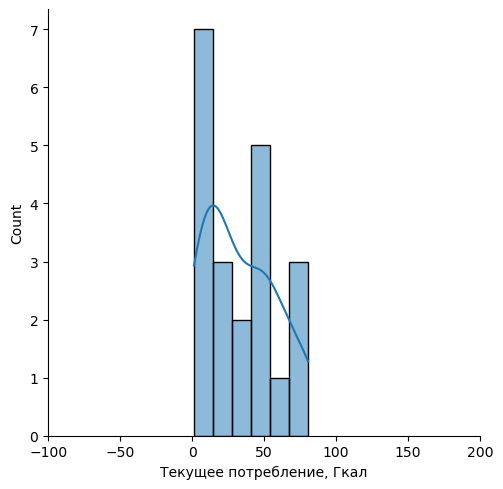

In [6]:

#sns.displot(df_all_temp_dummies_cut_build_param[df_all_temp_dummies_cut_build_param['dt'] == '2022-02-01']['Текущее потребление, Гкал'])
#plt.xlim(-100, 1500)
sns.displot(df_all_temp_dummies_cut_build_param[df_all_temp_dummies_cut_build_param['Адрес объекта'] == 'ул. Юрия Гагарина, д.80']['Текущее потребление, Гкал'],kde=True)
plt.xlim(-100, 200)

(-50.0, 200.0)

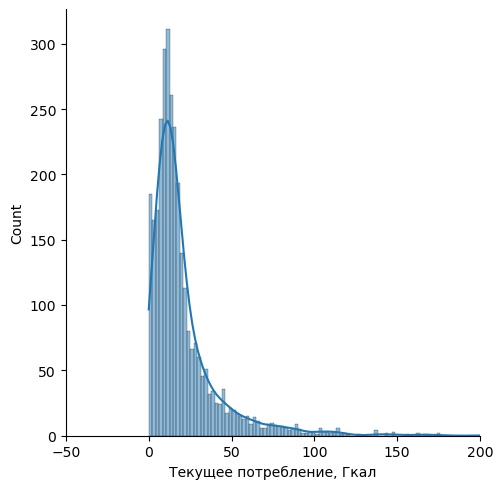

In [7]:
#гистограмма постребления летом

sns.displot(df_all_temp_dummies_cut_build_param[df_all_temp_dummies_cut_build_param['dt'].between('2022-06-01','2022-08-01')]['Текущее потребление, Гкал'],kde=True)
plt.xlim(-50, 200)

(-100.0, 1000.0)

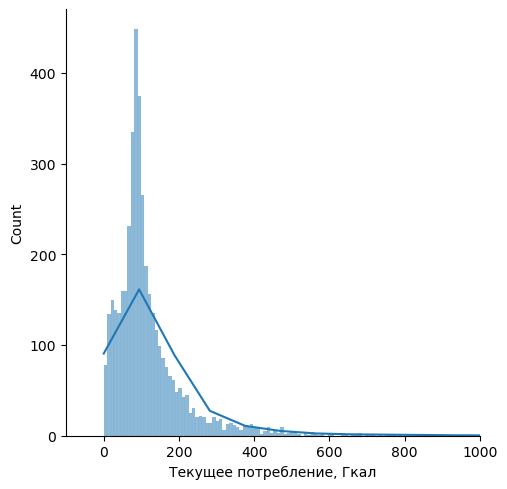

In [8]:
sns.displot(df_all_temp_dummies_cut_build_param[df_all_temp_dummies_cut_build_param['dt'] == '2022-02-01']['Текущее потребление, Гкал'], kde=True)
plt.xlim(-100, 1000)

(-100.0, 800.0)

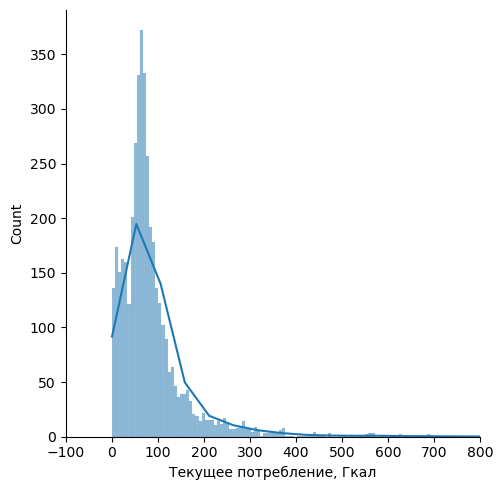

In [76]:
sns.displot(df_all_temp_dummies_cut_build_param[df_all_temp_dummies_cut_build_param['dt'] == '2022-04-01']['Текущее потребление, Гкал'],kde=True)
plt.xlim(-100, 800)

<Axes: xlabel='dt', ylabel='Текущее потребление, Гкал'>

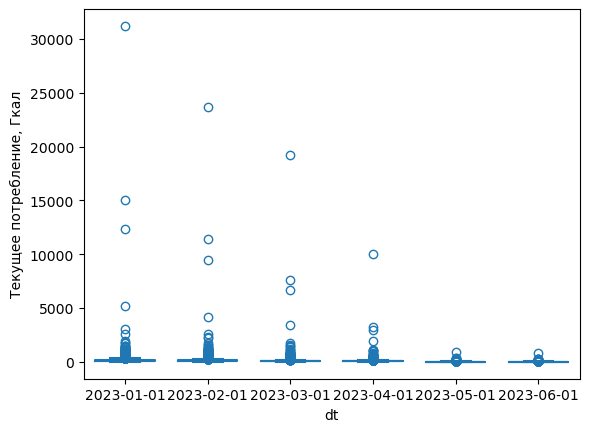

In [46]:
#df_all_temp_dummies_cut_build_param.reset_index()
#df_all_temp_dummies_cut_build_param[df_all_temp_dummies_cut_build_param['dt'].dt.year == 2023]

#sns.boxplot(data=df_all_temp_dummies_cut_build_param['dt'].dt.year == 2023, x="class", y="age", hue="alive", fill=False, gap=.1)

sns.boxplot(data=df_all_temp_dummies_cut_build_param[df_all_temp_dummies_cut_build_param['dt'].dt.year == 2023], x="dt", y="Текущее потребление, Гкал", fill=False, gap=.1)

In [48]:
df_all_temp_dummies_cut_build_param['Адрес объекта'].value_counts().index[0]
# найдем самый часто упоминаемый адрес и построим box plot

'ул. Достоевского, д.132'

<Axes: xlabel='dt', ylabel='Текущее потребление, Гкал'>

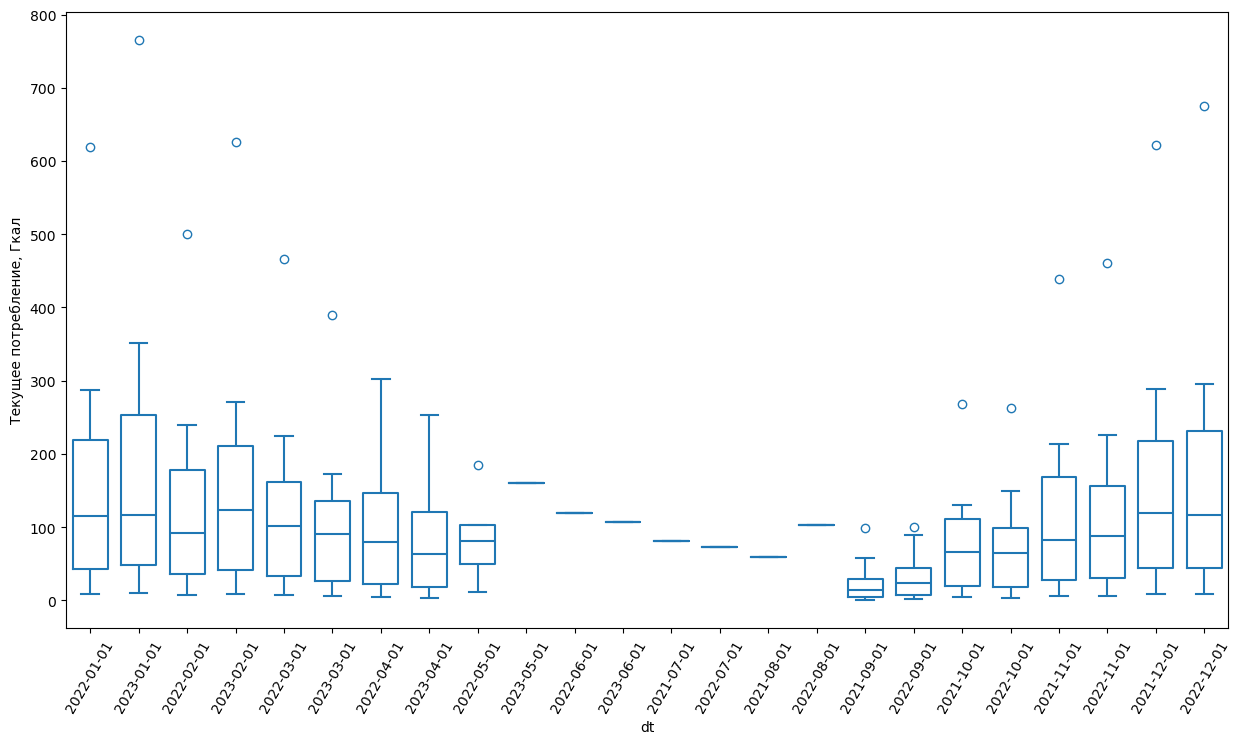

In [59]:
#subset = df_all_temp_dummies_cut_build_param[
#    (df_all_temp_dummies_cut_build_param['dt'].dt.year == 2023) &
#    (df_all_temp_dummies_cut_build_param['Адрес объекта'] == 'ул. Достоевского, д.132')
#]
subset = df_all_temp_dummies_cut_build_param[
   
    df_all_temp_dummies_cut_build_param['Адрес объекта'] == 'ул. Достоевского, д.132'
]
plt.figure(figsize=(15,8))

plt.tick_params(axis='x', rotation=60)

sns.boxplot(
    data=subset,
    x="dt",
    y="Текущее потребление, Гкал",
    fill=False,
    gap=.1
)


#sns.boxplot(data=df_all_temp_dummies_cut_build_param[(df_all_temp_dummies_cut_build_param['dt'].dt.year == 2023) and (df_all_temp_dummies_cut_build_param['Адрес объекта'] == 'ул. Достоевского, д.132')], x="dt", y="Текущее потребление, Гкал", fill=False, gap=.1)

**Проверим стационарность и автоорреляцию данных**

In [66]:

#df_all_temp_dummies_cut_build_param = df_all_temp_dummies_cut_build_param.set_index(['dt','№ ОДПУ'])
df_all_temp_dummies_cut_build_param.head()


adf_test = adfuller(df_all_temp_dummies_cut_build_param["Текущее потребление, Гкал"])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
#данные нестационарные

ADF Statistic: -21.178239
p-value: 0.000000


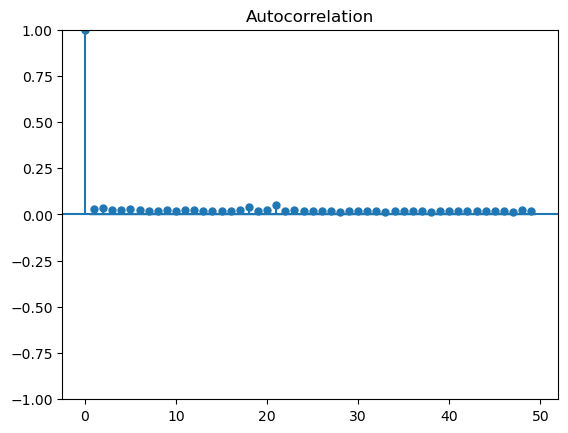

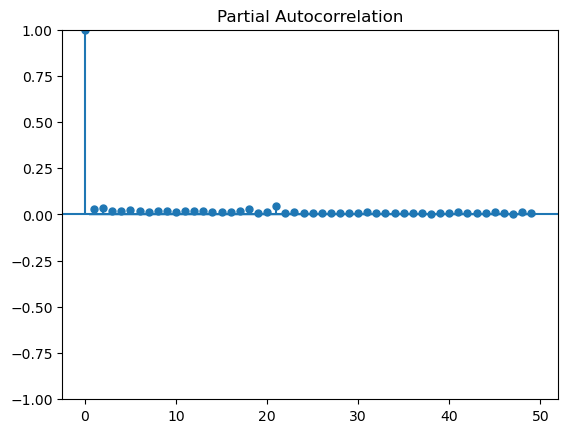

In [68]:
plot_acf(df_all_temp_dummies_cut_build_param["Текущее потребление, Гкал"])
plot_pacf(df_all_temp_dummies_cut_build_param["Текущее потребление, Гкал"])
plt.show()
#автокорреляции нет

In [69]:
df_all_temp_dummies_cut_build_param.columns

Index(['Адрес объекта', 'Тип объекта', 'Дата текущего показания',
       'Текущее потребление, Гкал', 'avg_temp', 'days', 'ГВС-ИТП',
       'Тип Объекта', 'Общая площадь объекта', 'year_range_1959-1989',
       'year_range_1990-2000', 'year_range_2001-2010', 'year_range_2011-2024',
       'Number_of_storeys_range_3-4', 'Number_of_storeys_range_5-9',
       'Number_of_storeys_range_10-12', 'Number_of_storeys_range_> 13'],
      dtype='object')

**Определим  аномалии вручную**


1. считаем нули для ['Текущее потребление, Гкал'] 

In [73]:

len(df_all_temp_dummies_cut_build_param[df_all_temp_dummies_cut_build_param['Текущее потребление, Гкал'] == 0])

#кол-во нулей для таргет столбца  ['Текущее потребление, Гкал'] = 32

32

2. проверим nan для столбца 'Текущее потребление, Гкал'

In [82]:

df_all_temp_dummies_cut_build_param[df_all_temp_dummies_cut_build_param['Текущее потребление, Гкал'].isna()]
#nan нет, тк мы дропнули ранее строки, если оба значения 'Дата текущего показания', 'Текущее потребление, Гкал' пустые

,,Адрес объекта,Тип объекта,Дата текущего показания,"Текущее потребление, Гкал",avg_temp,days,ГВС-ИТП,Тип Объекта,Общая площадь объекта,year_range_1959-1989,year_range_1990-2000,year_range_2001-2010,year_range_2011-2024,Number_of_storeys_range_3-4,Number_of_storeys_range_5-9,Number_of_storeys_range_10-12,Number_of_storeys_range_> 13
dt,№ ОДПУ,,,,,,,,,,,,,,,,,


 3. проверим соседние значения для нашего таргета 'Текущее потребление, Гкал'

In [81]:
#
eq_vals = (df_all_temp_dummies_cut_build_param['Текущее потребление, Гкал'] == df_all_temp_dummies_cut_build_param['Текущее потребление, Гкал'].shift(1))| (df_all_temp_dummies_cut_build_param['Текущее потребление, Гкал'] == df_all_temp_dummies_cut_build_param['Текущее потребление, Гкал'].shift(-1))

df_all_temp_dummies_cut_build_param.loc[eq_vals, 'Текущее потребление, Гкал']

# имеем следующие аномалии: 


dt          № ОДПУ   
2022-01-01  108491       122.540
            108684       122.540
2023-02-01  00273416     142.989
            00273416     142.989
2022-04-01  114390       101.094
            114390       101.094
2023-04-01  27468          4.770
            120076         4.770
2022-05-01  1647776        6.000
            1646112        6.000
            62015          5.690
            4419050        5.690
2023-06-01  35030          0.000
            29875          0.000
2022-07-01  20-128030     17.848
            20-128030     17.848
2022-10-01  35136        116.000
            120144       116.000
Name: Текущее потребление, Гкал, dtype: float64

4. Вычислим снижение/рост показаний в отдельные месяцы по сравнению с показаниями за предыдущие периоды по данному объекту

In [194]:
#df_all_temp_dummies_cut_build_param['Месяц'] = df_all_temp_dummies_cut_build_param['dt'].dt.month
df_all_temp_dummies_cut_build_param.columns

Index(['Адрес объекта', 'dt', '№ ОДПУ', 'Тип объекта',
       'Дата текущего показания', 'Текущее потребление, Гкал', 'avg_temp',
       'days', 'ГВС-ИТП', 'Общая площадь объекта', 'year_range_1959-1989',
       'year_range_1990-2000', 'year_range_2001-2010', 'year_range_2011-2024',
       'Number_of_storeys_range_3-4', 'Number_of_storeys_range_5-9',
       'Number_of_storeys_range_10-12', 'Number_of_storeys_range_> 13'],
      dtype='object')

In [136]:
df_grouped = df_all_temp_dummies_cut_build_param.groupby(['Месяц','Адрес объекта','№ ОДПУ'])['Текущее потребление, Гкал'].apply(list).reset_index()

In [137]:
# Функция для фильтрации значений, отличающихся более чем на 50%

def filter_significant_differences(row):
    if len(row['Текущее потребление, Гкал']) < 2:
        return []
    
    results = []
    for i in range(len(row['Текущее потребление, Гкал'])):
        for j in range(i + 1, len(row['Текущее потребление, Гкал'])):
            value1 = row['Текущее потребление, Гкал'][i]
            value2 = row['Текущее потребление, Гкал'][j]
            if value1 == 0 or value2 == 0:
                continue  
            if abs(value1 - value2) / min(value1, value2) > 0.4:  # Проверка на разницу более 50%
                results.append((value1, value2))
    
    return results

# Применяем фильтрацию
df_grouped['Различия'] = df_grouped.apply(filter_significant_differences, axis=1)

# Отфильтровываем только те месяцы, где есть значительные различия
#result = grouped[grouped['Различия'].str.len() > 0]

#print(result[['Месяц', 'Различия']])

In [138]:

df_grouped[df_grouped['Различия'].str.len() > 0]

,Месяц,Адрес объекта,№ ОДПУ,"Текущее потребление, Гкал",Различия
47,1,"б-р. Ибрагимова, д.84, Подобъект №984440",18-058175,"[56.39, 81.716]","[(56.39, 81.716)]"
96,1,"б-р. Тухвата Янаби, д.24",1200120,"[370.6153, 252.9282]","[(370.6153, 252.9282)]"
136,1,"б-р. Тухвата Янаби, д.73",69203,"[13.41, 31.855]","[(13.41, 31.855)]"
156,1,"б-р. Хадии Давлетшиной, д.13 корп.1",70935,"[78.732, 130.003]","[(78.732, 130.003)]"
262,1,"пр-кт Октября, д.12 корп.4",284303,"[9.599, 5.48]","[(9.599, 5.48)]"
...,...,...,...,...,...
36833,12,"ул. Юрия Гагарина, д.10 корп.2, Подобъект №51263",254404,"[12.058, 18.419]","[(12.058, 18.419)]"
36886,12,"ул. Юрия Гагарина, д.39 корп.2",286469,"[118.758, 168.38]","[(118.758, 168.38)]"
36904,12,"ул. Юрия Гагарина, д.46 корп.5",153755,"[54.87, 78.287]","[(54.87, 78.287)]"
36907,12,"ул. Юрия Гагарина, д.48 корп.1",172861,"[15.424, 29.668]","[(15.424, 29.668)]"


In [128]:
df_all_temp_dummies_cut_build_param[(df_all_temp_dummies_cut_build_param['Адрес объекта'] == 'б-р. Ибрагимова, д.47 корп.1') & (df_all_temp_dummies_cut_build_param['dt'].dt.month == 1)]




,dt,№ ОДПУ,Адрес объекта,Тип объекта,Дата текущего показания,"Текущее потребление, Гкал",avg_temp,days,ГВС-ИТП,Тип Объекта,Общая площадь объекта,year_range_1959-1989,year_range_1990-2000,year_range_2001-2010,year_range_2011-2024,Number_of_storeys_range_3-4,Number_of_storeys_range_5-9,Number_of_storeys_range_10-12,Number_of_storeys_range_> 13,Месяц
3134,2022-01-01,032329,"б-р. Ибрагимова, д.47 корп.1",Многоквартирный дом,2022-02-01,21.578,-11.9,31,False,Многоквартирный дом,9474.3,True,False,False,False,False,True,False,False,1
3856,2022-01-01,219785,"б-р. Ибрагимова, д.47 корп.1",Многоквартирный дом,2022-02-01,314.287,-11.9,31,True,Многоквартирный дом,9474.3,True,False,False,False,False,True,False,False,1
4248,2023-01-01,219785,"б-р. Ибрагимова, д.47 корп.1",Многоквартирный дом,2023-02-01,309.606,-14.9,31,True,Многоквартирный дом,9474.3,True,False,False,False,False,True,False,False,1
4249,2023-01-01,032329,"б-р. Ибрагимова, д.47 корп.1",Многоквартирный дом,2023-02-01,25.951,-14.9,31,False,Многоквартирный дом,9474.3,True,False,False,False,False,True,False,False,1


In [153]:
df_all_temp_dummies_cut_build_param = df_all_temp_dummies_cut_build_param.reset_index()

In [593]:
#data_pivot = df_all_temp_dummies_cut_build_param.pivot(index='Дата текущего показания', columns='avg_temp', values='Текущее потребление, Гкал')
df_all_temp_dummies_cut_build_param = df_all_temp_dummies_cut_build_param.set_index(['dt','№ ОДПУ'])
#df_to_pivot = df_all_temp_dummies_cut_build_param[df_all_temp_dummies_cut_build_param['dt',	'№ ОДПУ','Адрес объекта','Тип объекта','Дата текущего показания','Текущее потребление, Гкал','avg_temp','days']]

In [590]:
df_all_temp_dummies_cut_build_param = df_all_temp_dummies_cut_build_param.dropna()
df_all_temp_dummies_cut_build_param

,dt,№ ОДПУ,Тип объекта,"Текущее потребление, Гкал",avg_temp,days,ГВС-ИТП,Общая площадь объекта,year_range_1959-1989,year_range_1990-2000,year_range_2001-2010,year_range_2011-2024,Number_of_storeys_range_3-4,Number_of_storeys_range_5-9,Number_of_storeys_range_10-12,Number_of_storeys_range_> 13
1,2022-01-01,1740725,0.557138,74.6520,-11.9,31,False,0.079531,True,False,False,False,False,False,True,False
3,2022-01-01,98735,0.557138,167.4110,-11.9,31,False,-0.139965,True,False,False,False,False,True,False,False
4,2022-01-01,28884,0.557138,282.6800,-11.9,31,True,1.462582,False,False,True,False,False,False,False,True
5,2022-01-01,00277185,0.557138,31.4170,-11.9,31,False,-0.726110,False,False,False,False,False,False,False,False
6,2022-01-01,69203,0.557138,13.4100,-11.9,31,False,-0.764124,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70404,2022-12-01,292049,-1.974932,58.1630,-12.7,31,False,-0.884234,False,False,False,False,True,False,False,False
70405,2022-12-01,1645655,-1.613207,72.8100,-12.7,31,True,-0.884236,False,False,False,False,True,False,False,False
70406,2022-12-01,101410,0.557138,205.1315,-12.7,31,False,0.321486,True,False,False,False,False,True,False,False
70407,2022-12-01,595,-1.613207,27351.0000,-12.7,31,True,-0.884236,False,False,False,False,False,False,False,False


In [587]:
le = LabelEncoder()

list_str = ['Тип объекта']
for c in list_str:
    df_all_temp_dummies_cut_build_param[c] = le.fit_transform(df_all_temp_dummies_cut_build_param[c])
#    print(dict(zip(le.classes_,range(len(le.classes_)))))



#std_scaler = StandardScaler()
#scaled_df = std_scaler.fit_transform(df_all_temp_dummies_cut_build_param)

In [588]:

std_scaler = StandardScaler()

cols = list(df_all_temp_dummies_cut_build_param[['Тип объекта','Общая площадь объекта']])
scaler = StandardScaler()
df_all_temp_dummies_cut_build_param[cols] = scaler.fit_transform(df_all_temp_dummies_cut_build_param[cols])

In [589]:
df_all_temp_dummies_cut_build_param

,dt,№ ОДПУ,Тип объекта,"Текущее потребление, Гкал",avg_temp,days,ГВС-ИТП,Общая площадь объекта,year_range_1959-1989,year_range_1990-2000,year_range_2001-2010,year_range_2011-2024,Number_of_storeys_range_3-4,Number_of_storeys_range_5-9,Number_of_storeys_range_10-12,Number_of_storeys_range_> 13
0,2022-01-01,147256,-1.613207,24.4720,-11.9,31,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01,1740725,0.557138,74.6520,-11.9,31,False,0.079531,True,False,False,False,False,False,True,False
2,2022-01-01,247368,-1.613207,20.7810,-11.9,31,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01,98735,0.557138,167.4110,-11.9,31,False,-0.139965,True,False,False,False,False,True,False,False
4,2022-01-01,28884,0.557138,282.6800,-11.9,31,True,1.462582,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70404,2022-12-01,292049,-1.974932,58.1630,-12.7,31,False,-0.884234,False,False,False,False,True,False,False,False
70405,2022-12-01,1645655,-1.613207,72.8100,-12.7,31,True,-0.884236,False,False,False,False,True,False,False,False
70406,2022-12-01,101410,0.557138,205.1315,-12.7,31,False,0.321486,True,False,False,False,False,True,False,False
70407,2022-12-01,595,-1.613207,27351.0000,-12.7,31,True,-0.884236,False,False,False,False,False,False,False,False


In [537]:

pca = PCA(n_components=4)
df_aft_pca = pca.fit_transform(df_all_temp_dummies_cut_build_param)

In [532]:
print(pca.components_)

[[ 0.1108607  -0.06617068 -0.12039853 -0.02476943 -0.24298598 -0.23722268
   0.44720987 -0.05994295 -0.1968296  -0.4171102  -0.10672817  0.45349059
  -0.16157422 -0.43982012]
 [ 0.5112648   0.04730141  0.05774148  0.02033216  0.03730776  0.49069632
   0.25091419  0.05977251  0.04609532  0.2217729  -0.43205284  0.3353869
   0.0590826   0.26450935]
 [ 0.07683334  0.09718421 -0.36064043 -0.10919911 -0.43870404  0.0734355
  -0.20640893  0.45080594  0.23544089 -0.19709749 -0.1484328  -0.11492165
   0.49896648 -0.14315934]
 [ 0.12071792 -0.48488493  0.55674476  0.26952401  0.24058814 -0.08679475
  -0.03111373  0.13799642  0.27489161 -0.22382575 -0.05778649  0.01182518
   0.33194843 -0.20723555]]


In [533]:
print(sum(pca.explained_variance_ratio_))

0.5466380786649111


In [538]:
df_aft_pca

pca0      pca1      pca2       pca3
dt         № ОДПУ                                           
2022-01-01 1740725   0.184090  0.293546  2.100336   0.429316
           98735     1.669499  0.673558  0.210285  -0.762343
           28884    -3.431125  1.539313  0.481569  -0.236120
           00277185  0.028822 -0.806869  0.774136  -0.490299
           69203     0.935663 -0.325996  0.353632  -0.525047
...                       ...       ...       ...        ...
2022-12-01 292049   -0.513656 -3.410651  0.181163  -1.027115
           1645655  -0.973041 -3.147518 -0.684062  -0.511223
           101410    1.562713  0.900332  0.283066  -0.897427
           595      -5.669227  1.657330  7.082375 -36.986765
           1981     -0.201079 -1.972663  0.677970  -1.049678

[68502 rows x 4 columns]

**Разбиваем на кластеры**




In [230]:
le = LabelEncoder()
df['Адрес объекта'] = le.fit_transform(df['Адрес объекта'])

df['Тип объекта'] = le.fit_transform(df['Адрес объекта'])

df['Дата текущего показания'] = le.fit_transform(df['Дата текущего показания'])

#KMeans не подходит, тк nan в данных
features = ['Адрес объекта', 'Тип объекта', 'Дата текущего показания','Текущее потребление, Гкал', 'avg_temp', 'days', 'ГВС-ИТП', 'Общая площадь объекта', 'year_range_1959-1989',
       'year_range_1990-2000', 'year_range_2001-2010', 'year_range_2011-2024',
       'Number_of_storeys_range_3-4', 'Number_of_storeys_range_5-9',
       'Number_of_storeys_range_10-12', 'Number_of_storeys_range_> 13']



#clusterer = hdbscan.HDBSCAN()
#clusterer.fit(df)
#clusterer.labels_
#clusterer.labels_.max()


clusterer = hdbscan.HDBSCAN(min_cluster_size=5).fit(df_w_nan)
outlier_scores = clusterer.outlier_scores_

threshold = np.percentile(outlier_scores, 95)  # Например, выбросы выше 95-го процента
outliers = df_w_nan[outlier_scores > threshold]
clusterer.labels_
clusterer.labels_.max()
outlier_scores



# Применяем PCA для уменьшения размерности до 2D
#pca = PCA(n_components=2)
#principalComponents = pca.fit_transform(df_all_temp_dummies_cut_build_param[features])
#principalDf = pd.DataFrame(data=principalComponents,
#                           columns=['PC1', 'PC2'])

# Добавляем столбец с метками кластеров
#finalDf = principalDf.assign(cluster=labels)

# Строим график рассеяния с использованием Seaborn
#sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=finalDf)
#plt.title('Scatter Plot of Clustered Data using PCA')
#plt.show()

array([0.14740664, 0.11183328, 0.2272671 , ..., 0.06809199, 0.61748578,
       0.09977692])

In [241]:

#clusterer = hdbscan.HDBSCAN(branch_detection_data=True).fit(df_w_nan)
#branch_detector = hdbscan.BranchDetector().fit(clusterer)
#branch_detector.cluster_approximation_graph_.plot(edge_width=0.1)

In [398]:
## попробовать PCA
# попробовать hdbscan

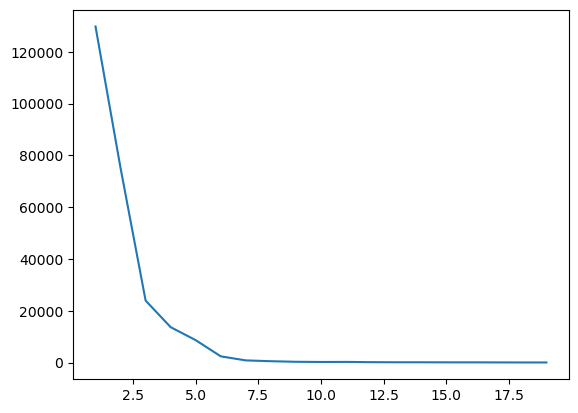

In [594]:
#посчитать  кол-во кластеров методом локтя
#df_w_nan = df.dropna()
dataset=df_all_temp_dummies_cut_build_param.iloc[:,[0,3]].values
dataset

from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(dataset)
  WCSS.append(kmeans.inertia_)
WCSS

plt.plot(range(1,20),WCSS)

In [561]:
#KMeans кластеризация данных без nan
df_all_temp_dummies_cut_build_param.columns

Index(['Тип объекта', 'Текущее потребление, Гкал', 'avg_temp', 'days',
       'ГВС-ИТП', 'Общая площадь объекта', 'year_range_1959-1989',
       'year_range_1990-2000', 'year_range_2001-2010', 'year_range_2011-2024',
       'Number_of_storeys_range_3-4', 'Number_of_storeys_range_5-9',
       'Number_of_storeys_range_10-12', 'Number_of_storeys_range_> 13'],
      dtype='object')

In [595]:
features = ['Тип объекта', 'Текущее потребление, Гкал', 'avg_temp', 'days',
       'ГВС-ИТП', 'Общая площадь объекта', 'year_range_1959-1989',
       'year_range_1990-2000', 'year_range_2001-2010', 'year_range_2011-2024',
       'Number_of_storeys_range_3-4', 'Number_of_storeys_range_5-9',
       'Number_of_storeys_range_10-12', 'Number_of_storeys_range_> 13']


# Выполним кластеризацию с помощью KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_all_temp_dummies_cut_build_param[features])
#labels = kmeans.labels_
#labels.max()
cluster_labels = kmeans.predict(df_all_temp_dummies_cut_build_param[features])

# Find the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers

#df_w_nan[features].iloc[1]

#np.linalg.norm(df_w_nan[features].iloc[1] - cluster_centers[1])

# Calculate the distance from each point to its assigned cluster center
#distances = [np.linalg.norm(x - cluster_centers[cluster]) for x, cluster in zip(df_w_nan[features], cluster_labels)]

#distances = [np.linalg.norm(df_w_nan[features].iloc[i] - cluster_centers[cluster_labels[i]]) for i in range(100)]

distances = []


for i in range(len(cluster_labels)):
    if i % 1000 == 0: print("...", i)
    distance = np.linalg.norm(df_all_temp_dummies_cut_build_param[features].iloc[i] - cluster_centers[cluster_labels[i]])
    distances.append(distance)
    

# Применяем PCA для уменьшения размерности до 2D
#pca = PCA(n_components=2)
#principalComponents = pca.fit_transform(df_all_temp_dummies_cut_build_param[features])
#principalDf = pd.DataFrame(data=principalComponents,
#                           columns=['PC1', 'PC2'])

# Добавляем столбец с метками кластеров
#finalDf = principalDf.assign(cluster=labels)

# Строим график рассеяния с использованием Seaborn
#sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=finalDf)
#plt.title('Scatter Plot of Clustered Data using PCA')
#plt.show()

... 0
... 1000
... 2000
... 3000
... 4000
... 5000
... 6000
... 7000
... 8000
... 9000
... 10000
... 11000
... 12000
... 13000
... 14000
... 15000
... 16000
... 17000
... 18000
... 19000
... 20000
... 21000
... 22000
... 23000
... 24000
... 25000
... 26000
... 27000
... 28000
... 29000
... 30000
... 31000
... 32000
... 33000
... 34000
... 35000
... 36000
... 37000
... 38000
... 39000
... 40000
... 41000
... 42000
... 43000
... 44000
... 45000
... 46000
... 47000
... 48000
... 49000
... 50000
... 51000
... 52000
... 53000
... 54000
... 55000
... 56000
... 57000
... 58000
... 59000
... 60000
... 61000
... 62000
... 63000
... 64000
... 65000
... 66000
... 67000
... 68000


In [596]:
percentile_threshold = 95
threshold_distance = np.percentile(distances, percentile_threshold)

In [597]:
threshold_distance

149.8029237324377

In [598]:
df_temp= df_all_temp_dummies_cut_build_param.reset_index()
df_temp

,dt,№ ОДПУ,Тип объекта,"Текущее потребление, Гкал",avg_temp,days,ГВС-ИТП,Общая площадь объекта,year_range_1959-1989,year_range_1990-2000,year_range_2001-2010,year_range_2011-2024,Number_of_storeys_range_3-4,Number_of_storeys_range_5-9,Number_of_storeys_range_10-12,Number_of_storeys_range_> 13
0,2022-01-01,1740725,0.557138,74.6520,-11.9,31,False,0.079531,True,False,False,False,False,False,True,False
1,2022-01-01,98735,0.557138,167.4110,-11.9,31,False,-0.139965,True,False,False,False,False,True,False,False
2,2022-01-01,28884,0.557138,282.6800,-11.9,31,True,1.462582,False,False,True,False,False,False,False,True
3,2022-01-01,00277185,0.557138,31.4170,-11.9,31,False,-0.726110,False,False,False,False,False,False,False,False
4,2022-01-01,69203,0.557138,13.4100,-11.9,31,False,-0.764124,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68497,2022-12-01,292049,-1.974932,58.1630,-12.7,31,False,-0.884234,False,False,False,False,True,False,False,False
68498,2022-12-01,1645655,-1.613207,72.8100,-12.7,31,True,-0.884236,False,False,False,False,True,False,False,False
68499,2022-12-01,101410,0.557138,205.1315,-12.7,31,False,0.321486,True,False,False,False,False,True,False,False
68500,2022-12-01,595,-1.613207,27351.0000,-12.7,31,True,-0.884236,False,False,False,False,False,False,False,False


In [602]:

#distances_df = pd.Series(distances, name="distances")
#df_temp_distance = pd.concat([df_temp, distances_df], axis=1)
#outliers = df_temp_distance[df_temp_distance['distances'] > threshold_distance]
outliers[outliers['Текущее потребление, Гкал'] == 0]
##df_w_nan['distances'] = distances_df_tmp[0]
##df_w_nan[df_w_nan['distances'] > threshold_distance]
##df_w_nan_temp.merge(distances_df.to_frame(),left_index=True)

#Почему-то 0 в Текущем потреблении не вошли в outliers((((((
#Нужно искать другой метод

,dt,№ ОДПУ,Тип объекта,"Текущее потребление, Гкал",avg_temp,days,ГВС-ИТП,Общая площадь объекта,year_range_1959-1989,year_range_1990-2000,year_range_2001-2010,year_range_2011-2024,Number_of_storeys_range_3-4,Number_of_storeys_range_5-9,Number_of_storeys_range_10-12,Number_of_storeys_range_> 13,distances


In [571]:
#df_w_nan_temp = df_w_nan
#df_w_nan_temp = df_w_nan_temp.reset_index()
df_temp_distance

,dt,№ ОДПУ,Тип объекта,"Текущее потребление, Гкал",avg_temp,days,ГВС-ИТП,Общая площадь объекта,year_range_1959-1989,year_range_1990-2000,year_range_2001-2010,year_range_2011-2024,Number_of_storeys_range_3-4,Number_of_storeys_range_5-9,Number_of_storeys_range_10-12,Number_of_storeys_range_> 13,distances
0,2022-01-01,1740725,0.557138,-0.091490,-1.152501,0.690479,-0.809999,0.079531,0.984947,-0.32858,-0.279154,-0.267717,-0.410184,-1.086868,3.011360,-0.291327,3.914551
1,2022-01-01,98735,0.557138,0.165466,-1.152501,0.690479,-0.809999,-0.139965,0.984947,-0.32858,-0.279154,-0.267717,-0.410184,0.920075,-0.332076,-0.291327,1.533099
2,2022-01-01,28884,0.557138,0.484778,-1.152501,0.690479,1.234570,1.462582,-1.015283,-0.32858,3.582247,-0.267717,-0.410184,-1.086868,-0.332076,3.432566,5.306608
3,2022-01-01,00277185,0.557138,-0.211258,-1.152501,0.690479,-0.809999,-0.726110,-1.015283,-0.32858,-0.279154,-0.267717,-0.410184,-1.086868,-0.332076,-0.291327,2.514533
4,2022-01-01,69203,0.557138,-0.261140,-1.152501,0.690479,-0.809999,-0.764124,0.984947,-0.32858,-0.279154,-0.267717,-0.410184,-1.086868,-0.332076,-0.291327,2.533792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68497,2022-12-01,292049,-1.974932,-0.137167,-1.232191,0.690479,-0.809999,-0.884234,-1.015283,-0.32858,-0.279154,-0.267717,2.437931,-1.086868,-0.332076,-0.291327,3.491042
68498,2022-12-01,1645655,-1.613207,-0.096593,-1.232191,0.690479,1.234570,-0.884236,-1.015283,-0.32858,-0.279154,-0.267717,2.437931,-1.086868,-0.332076,-0.291327,3.173287
68499,2022-12-01,101410,0.557138,0.269957,-1.232191,0.690479,-0.809999,0.321486,0.984947,-0.32858,-0.279154,-0.267717,-0.410184,0.920075,-0.332076,-0.291327,1.616640
68500,2022-12-01,595,-1.613207,75.467983,-1.232191,0.690479,1.234570,-0.884236,-1.015283,-0.32858,-0.279154,-0.267717,-0.410184,-1.086868,-0.332076,-0.291327,75.429024


In [388]:
df_w_nan[df_w_nan['Текущее потребление, Гкал'] == 0]

Адрес объекта  Тип объекта  Дата текущего показания  \
dt         № ОДПУ                                                              
2022-01-01 13493                   683          683                        7   
2022-06-01 20-128030              2089         2089                       14   
2023-06-01 261711                  311          311                       30   
           35030                  2099         2099                       30   
           29875                  2099         2099                       30   
           286214                 2446         2446                       30   
2021-07-01 13493                   683          683                        0   
           13006302               3131         3131                        0   
2022-07-01 18057681               3188         3188                       17   
2021-08-01 28455                  1945         1945                        1   
           13493                   683          683                        1   
           18057681               3188         3188                        1   
           222747                  557          557                        1   
           13006302               3131         3131                        1   
           1542349                 554          554                        1   
2021-09-01 88978                  2838         2838                        2   
           22177396               2122         2122                        2   
           00218347               3051         3051                        2   
           18057681               3188         3188                        2   
           00218507               3051         3051                        2   
           27834                    43           43                        2   
2022-09-01 1245735                 635          635                       20   
2021-10-01 2300 N CF944           3514         3514                        3   
           57435                  2000         2000                        4   
2022-10-01 1555746                2167         2167                       21   
           16030038               2338         2338                       21   
2021-11-01 13493                   683          683                        5   
           01329161850            3334         3334                        5   
2021-12-01 13493                   683          683                        6   

                         Текущее потребление, Гкал  avg_temp  days  ГВС-ИТП  \
dt         № ОДПУ                                                             
2022-01-01 13493                               0.0     -11.9    31        1   
2022-06-01 20-128030                           0.0      16.4    30        1   
2023-06-01 261711                              0.0      16.5    30        0   
           35030                               0.0      16.5    30        1   
           29875                               0.0      16.5    30        1   
           286214                              0.0      16.5    30        1   
2021-07-01 13493                               0.0      20.7    31        1   
           13006302                            0.0      20.7    31        1   
2022-07-01 18057681                            0.0      20.4    31        1   
2021-08-01 28455                               0.0      21.4    31        1   
           13493                               0.0      21.4    31        1   
           18057681                            0.0      21.4    31        1   
           222747                              0.0      21.4    31        1   
           13006302                            0.0      21.4    31        1   
           1542349                             0.0      21.4    31        1   
2021-09-01 88978                               0.0      10.0    30        0   
           22177396                            0.0      10.0    30        1   
           00218347                        

In [575]:
#colors = cm.nipy_spectral(cluster_labels.astype(float) / 3)
#plt.scatter(X[:, 0], X[:, 1], marker='.', s=50, lw=0, alpha=0.7,c=colors, edgecolor='k')
#plt.scatter(anomalies[:, 0], anomalies[:, 1], color='purple', marker='.', s=50, label='Anomalies')
#plt.show()
#df_w_nan.head()
df_temp_distance

,dt,№ ОДПУ,Тип объекта,"Текущее потребление, Гкал",avg_temp,days,ГВС-ИТП,Общая площадь объекта,year_range_1959-1989,year_range_1990-2000,year_range_2001-2010,year_range_2011-2024,Number_of_storeys_range_3-4,Number_of_storeys_range_5-9,Number_of_storeys_range_10-12,Number_of_storeys_range_> 13,distances
0,2022-01-01,1740725,0.557138,-0.091490,-1.152501,0.690479,-0.809999,0.079531,0.984947,-0.32858,-0.279154,-0.267717,-0.410184,-1.086868,3.011360,-0.291327,3.914551
1,2022-01-01,98735,0.557138,0.165466,-1.152501,0.690479,-0.809999,-0.139965,0.984947,-0.32858,-0.279154,-0.267717,-0.410184,0.920075,-0.332076,-0.291327,1.533099
2,2022-01-01,28884,0.557138,0.484778,-1.152501,0.690479,1.234570,1.462582,-1.015283,-0.32858,3.582247,-0.267717,-0.410184,-1.086868,-0.332076,3.432566,5.306608
3,2022-01-01,00277185,0.557138,-0.211258,-1.152501,0.690479,-0.809999,-0.726110,-1.015283,-0.32858,-0.279154,-0.267717,-0.410184,-1.086868,-0.332076,-0.291327,2.514533
4,2022-01-01,69203,0.557138,-0.261140,-1.152501,0.690479,-0.809999,-0.764124,0.984947,-0.32858,-0.279154,-0.267717,-0.410184,-1.086868,-0.332076,-0.291327,2.533792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68497,2022-12-01,292049,-1.974932,-0.137167,-1.232191,0.690479,-0.809999,-0.884234,-1.015283,-0.32858,-0.279154,-0.267717,2.437931,-1.086868,-0.332076,-0.291327,3.491042
68498,2022-12-01,1645655,-1.613207,-0.096593,-1.232191,0.690479,1.234570,-0.884236,-1.015283,-0.32858,-0.279154,-0.267717,2.437931,-1.086868,-0.332076,-0.291327,3.173287
68499,2022-12-01,101410,0.557138,0.269957,-1.232191,0.690479,-0.809999,0.321486,0.984947,-0.32858,-0.279154,-0.267717,-0.410184,0.920075,-0.332076,-0.291327,1.616640
68500,2022-12-01,595,-1.613207,75.467983,-1.232191,0.690479,1.234570,-0.884236,-1.015283,-0.32858,-0.279154,-0.267717,-0.410184,-1.086868,-0.332076,-0.291327,75.429024


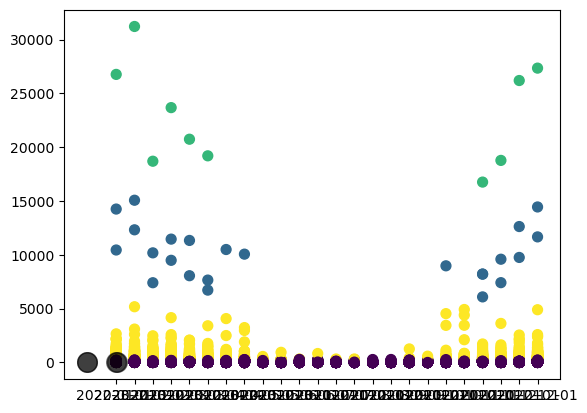

In [606]:
#sns.scatterplot(data=df_w_nan_temp_distance, x='Текущее потребление, Гкал', y='distances')
#df_w_nan_temp_distance['Текущее потребление, Гкал','distances']
centers = kmeans.cluster_centers_


x_axis = 'dt'
y_axis = 'Текущее потребление, Гкал'
plt.scatter(df_temp_distance[x_axis], 
            df_temp_distance[y_axis], c=cluster_labels, s=50, cmap='viridis')

plt.scatter(centers[:, df_temp_distance.columns.to_list().index(x_axis)],
            centers[:, df_temp_distance.columns.to_list().index(y_axis)], c='black', s=200, alpha=0.5);


In [451]:
df_w_nan.columns.to_list().index(x_axis)


7

In [610]:
list(df_all_temp_dummies_cut_build_param['Тип объекта'].unique())

['Другое строение',
 'Многоквартирный дом',
 'Автомойка',
 'Учебное заведение, комбинат, центр',
 'Жилое здание (Гостиница, Общежитие)',
 'Школы и ВУЗ',
 'Административные здания, конторы',
 'Магазины',
 'Казармы и помещения ВОХР',
 'Дет.ясли и сады',
 'Общежитие',
 'Спортзалы, крытые стадионы и другие спортивные сооружения',
 'Пожарное депо',
 'Интернат',
 'Автостоянка',
 'Гаражи',
 'Производственный объект',
 'Больницы',
 'Медицинское учреждение',
 'Нежилой дом',
 'Групповая станция смешения']

**Кластеризация не привела к адекватным результатам. Попробуем отметить аномалии вручную**

**Создадим столбец anomaly и добавим значеня 0 (нет аномалии) и 1 - есть аномалия**

In [812]:

df_all_temp_dummies_cut_build_param.head()
df_all_temp_dummies_cut_build_param['anomaly'] = 0

len(df_all_temp_dummies_cut_build_param[df_all_temp_dummies_cut_build_param['Текущее потребление, Гкал'] == 0])


32

In [817]:
# аномалия, если Текущее потребление, Гкал' == 0
#df_all_temp_dummies_cut_build_param.loc[df_all_temp_dummies_cut_build_param['Текущее потребление, Гкал'] == 0]

df_all_temp_dummies_cut_build_param.loc[ df_all_temp_dummies_cut_build_param['Текущее потребление, Гкал'] == 0, 'anomaly'] = 1
len(df_all_temp_dummies_cut_build_param[df_all_temp_dummies_cut_build_param['anomaly'] == 1])

32

In [818]:
# аномалия, если соседние значения Текущее потребление, Гкал' одинаковые
eq_vals = (df_all_temp_dummies_cut_build_param['Текущее потребление, Гкал'] == df_all_temp_dummies_cut_build_param['Текущее потребление, Гкал'].shift(1))| (df_all_temp_dummies_cut_build_param['Текущее потребление, Гкал'] == df_all_temp_dummies_cut_build_param['Текущее потребление, Гкал'].shift(-1))

df_all_temp_dummies_cut_build_param.loc[eq_vals, 'anomaly'] = 1

#df_all_temp_dummies_cut_build_param.loc[eq_vals]
len(df_all_temp_dummies_cut_build_param[df_all_temp_dummies_cut_build_param['anomaly'] == 1])

48

In [819]:
# снижение/рост показаний в отдельные месяцы по сравнению с показаниями за предыдущие периоды по данному объекту
df_all_temp_dummies_cut_build_param['dt'] = pd.to_datetime(df_all_temp_dummies_cut_build_param['dt'])

In [820]:
df_all_temp_dummies_cut_build_param.columns

,Адрес объекта,dt,№ ОДПУ,Тип объекта,Дата текущего показания,"Текущее потребление, Гкал",avg_temp,days,ГВС-ИТП,Тип Объекта,Общая площадь объекта,year_range_1959-1989,year_range_1990-2000,year_range_2001-2010,year_range_2011-2024,Number_of_storeys_range_3-4,Number_of_storeys_range_5-9,Number_of_storeys_range_10-12,Number_of_storeys_range_> 13,anomaly
0,"ул. Петергофская, д.2",2022-01-01,147256,Другое строение,2022-02-01,24.472,-11.9,31,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,"ул. Кирова, д.103",2022-01-01,1740725,Многоквартирный дом,2022-02-01,74.652,-11.9,31,False,Многоквартирный дом,4523.0,True,False,False,False,False,False,True,False,0
2,"ул. Трамвайная, д.13 корп.1",2022-01-01,247368,Другое строение,2022-02-01,20.781,-11.9,31,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,"ул. Достоевского, д.112",2022-01-01,98735,Многоквартирный дом,2022-02-01,167.411,-11.9,31,False,Многоквартирный дом,3492.9,True,False,False,False,False,True,False,False,0
4,"ул. Рудольфа Нуреева, д.21",2022-01-01,28884,Многоквартирный дом,2022-02-01,282.680,-11.9,31,True,Многоквартирный дом,11013.7,False,False,True,False,False,False,False,True,0


In [835]:
#df_with_anom = df_grouped[df_grouped['Различия'].str.len() > 0][['Адрес объекта','Месяц','№ ОДПУ']]
features = ['Адрес объекта', 'dt', '№ ОДПУ', 'Тип объекта',
       'Дата текущего показания', 'Текущее потребление, Гкал', 'avg_temp',
       'days', 'ГВС-ИТП', 'Тип Объекта', 'Общая площадь объекта',
       'year_range_1959-1989', 'year_range_1990-2000', 'year_range_2001-2010',
       'year_range_2011-2024', 'Number_of_storeys_range_3-4',
       'Number_of_storeys_range_5-9', 'Number_of_storeys_range_10-12',
       'Number_of_storeys_range_> 13', 'Месяц', 'anomaly']
#cond = (
#    (df_all_temp_dummies_cut_build_param['Адрес объекта'] == df_with_anom['Адрес объекта']) &
#    (df_all_temp_dummies_cut_build_param['Месяц'] == df_with_anom['Месяц']) &
#    (df_all_temp_dummies_cut_build_param['№ ОДПУ'] == df_with_anom['№ ОДПУ'])
#)

 
        
mask = df_with_anom_cutted.index.isin(df_all_temp_dummies_cut_build_param.index)
#df_all_temp_dummies_cut_build_param.loc[mask, 'anomaly'] = 1


#df_all_temp_dummies_cut_build_param.loc[df_with_anom_cutted, 'anomaly'] = 1


print(df_all_temp_dummies_cut_build_param.index[0])
print(df_with_anom_cutted.index[0])

matching_indices = set(df_with_anom_cutted.index)
for index in df_all_temp_dummies_cut_build_param.index:
    if index in matching_indices:
        df_all_temp_dummies_cut_build_param.loc[index, 'anomaly'] = 1


#        if df_with_anom_cutted.index.index(i)['']
#        df_all_temp_dummies_cut_build_param.loc(i)['anomaly'] = 1
#df_all_temp_dummies_cut_build_param.loc[eq_vals, 'anomaly'] = 1


(1, 'ул. Петергофская, д.2')
(1, 'б-р. Тухвата Янаби, д.73')


In [823]:
# Функция для фильтрации значений, отличающихся более чем на 50%
df_all_temp_dummies_cut_build_param['Месяц'] = df_all_temp_dummies_cut_build_param['dt'].dt.month
df_grouped = df_all_temp_dummies_cut_build_param.groupby(['Месяц','Адрес объекта','№ ОДПУ'])['Текущее потребление, Гкал'].apply(list).reset_index()
def filter_significant_differences(row):
    if len(row['Текущее потребление, Гкал']) < 2:
        return []
    
    results = []
    for i in range(len(row['Текущее потребление, Гкал'])):
        for j in range(i + 1, len(row['Текущее потребление, Гкал'])):
            value1 = row['Текущее потребление, Гкал'][i]
            value2 = row['Текущее потребление, Гкал'][j]
            if value1 == 0 or value2 == 0:
                continue  
            if abs(value1 - value2) / min(value1, value2) > 0.8 or abs(value2 - value1) / min(value1, value2) > 0.8:  # Проверка на разницу более 50%
                results.append((value1, value2))
    
    return results

# Применяем фильтрацию
df_grouped['Различия'] = df_grouped.apply(filter_significant_differences, axis=1)

# Отфильтровываем только те месяцы, где есть значительные различия
df_with_anom = df_grouped[df_grouped['Различия'].str.len() > 0]



In [833]:
#df_with_anom.columns
#df_with_anom_cutted = df_with_anom[['Месяц', 'Адрес объекта']]
df_with_anom_cutted = df_with_anom_cutted.set_index(['Месяц', 'Адрес объекта'])

In [837]:
len(df_all_temp_dummies_cut_build_param[df_all_temp_dummies_cut_build_param['anomaly'] == 1])

3391

In [834]:
df_all_temp_dummies_cut_build_param = df_all_temp_dummies_cut_build_param.set_index(['Месяц', 'Адрес объекта'])

In [768]:
df_with_anom_cutted

Empty DataFrame
Columns: []
Index: [(1, б-р. Тухвата Янаби, д.73), (1, пр-кт Октября, д.158 корп.П), (1, тракт. Бирский), (1, ул. 8 Марта, д.7 корп.1), (1, ул. Бессонова, д.28 корп.1), (1, ул. Буревестника, д.12 корп.а), (1, ул. Гвардейская, д.58 корп.5), (1, ул. Достоевского, д.67), (1, ул. Достоевского, д.89), (1, ул. Запотоцкого, д.8 корп.1), (1, ул. Карима Хакимова, д.3), (1, ул. Кольцевая, д.185 корп.1), (1, ул. Кольцевая, д.37), (1, ул. Кольцевая, д.38, Подобъект №51129), (1, ул. Комсомольская, д.15, Подобъект №35951), (1, ул. Ленина, д.70), (1, ул. Лесотехникума, д.49 корп.1), (1, ул. Максима Рыльского, д.26 корп.2), (1, ул. Нежинская, д.28), (1, ул. Николая Дмитриева, д.21 корп.2), (1, ул. Пархоменко, д.155), (1, ул. Революционная, д.32, Подобъект №985061), (1, ул. Рихарда Зорге, д.14 корп.1), (1, ул. Российская, д.66 корп.а), (1, ул. Рудольфа Нуреева, д.1 корп.1-3), (1, ул. Рязанская, д.47), (1, ул. Самаркандская, д.1 корп.5), (1, ул. Ульяновых, д.66), (1, ул. Шафиева, д.1), (1, ул. Энтузиастов, д.16, Подобъект №984098), (2, б-р. Тухвата Янаби, д.73), (2, пр-кт Октября, д.12 корп.4), (2, пр-кт Октября, д.156), (2, пр-кт Октября, д.2), (2, пр-кт Октября, д.21), (2, пр-кт Октября, д.3 корп.1), (2, пр-кт Октября, д.45 корп.1), (2, проезд. Лесной, д.3 корп.1), (2, тракт. Бирский), (2, ул. 50-летия Октября, д.20 корп.1), (2, ул. 8 Марта, д.7 корп.1), (2, ул. Айская, д.80), (2, ул. Бессонова, д.28 корп.1), (2, ул. Буревестника, д.12 корп.а), (2, ул. Запотоцкого, д.8 корп.1), (2, ул. Карима Хакимова, д.3), (2, ул. Кирова, д.128 корп.а), (2, ул. Кольцевая, д.185 корп.1), (2, ул. Комсомольская, д.106), (2, ул. Лесотехникума, д.49 корп.1), (2, ул. Максима Рыльского, д.26 корп.2), (2, ул. Менделеева, д.217 корп.а), (2, ул. Менделеева, д.217 корп.а), (2, ул. Набережная р. Уфы, д.69 корп.3), (2, ул. Николая Дмитриева, д.5), (2, ул. Новочеркасская, д.14), (2, ул. Рихарда Зорге, д.14 корп.1), (2, ул. Рихарда Зорге, д.65), (2, ул. Рихарда Зорге, д.67 корп.1), (2, ул. Рихарда Зорге, д.71 корп.1), (2, ул. Российская, д.66 корп.а), (2, ул. Свободы, д.29), (2, ул. Ульяновых, д.66), (2, ул. Уфимское шоссе, д.38), (2, ул. Цюрупы, д.126), (2, ул. Шафиева, д.1), (2, ул. Энтузиастов, д.14, Подобъект №984513), (2, ул. Энтузиастов, д.16, Подобъект №984816), (2, ул. Энтузиастов, д.17), (2, ул. Энтузиастов, д.5), (3, б-р. Тухвата Янаби, д.32 корп.1), (3, б-р. Тухвата Янаби, д.34), (3, б-р. Тухвата Янаби, д.73), (3, б-р. Хадии Давлетшиной, д.13 корп.1), (3, б-р. Хадии Давлетшиной, д.30), (3, пр-кт Октября, д.12 корп.4), (3, пр-кт Октября, д.37 корп.5), (3, проезд. Лесной, д.3 корп.1), (3, проезд. Лесной, д.3 корп.а), (3, тракт. Бирский), (3, ул. 50 лет СССР, д.48 корп.1), (3, ул. 8 Марта, д.7 корп.1), (3, ул. Академика Заварицкого, д.8), (3, ул. Бессонова, д.28 корп.1), (3, ул. Гвардейская, д.39 корп.2), (3, ул. Гвардейская, д.56 корп.5), (3, ул. Георгия Мушникова, д.7 корп.3), (3, ул. Запотоцкого, д.8 корп.1), (3, ул. Индустриальное шоссе, д.1), (3, ул. Инициативная, д.12), (3, ул. Интернациональная, д.85 корп.А), (3, ул. Казанская, д.14), (3, ул. Кольцевая, д.185 корп.1), (3, ул. Комсомольская, д.106), (3, ул. Космонавтов, д.16), (3, ул. Крашенинникова, д.21), (3, ул. Кремлевская, д.65), (3, ул. Максима Рыльского, д.26 корп.2), (3, ул. Машиностроителей, д.21 корп.А), (3, ул. Менделеева, д.217 корп.а), ...]

[1414 rows x 0 columns]

In [841]:
df_all_temp_dummies_cut_build_param.reset_index()

,Месяц,Адрес объекта,dt,№ ОДПУ,Тип объекта,Дата текущего показания,"Текущее потребление, Гкал",avg_temp,days,ГВС-ИТП,...,Общая площадь объекта,year_range_1959-1989,year_range_1990-2000,year_range_2001-2010,year_range_2011-2024,Number_of_storeys_range_3-4,Number_of_storeys_range_5-9,Number_of_storeys_range_10-12,Number_of_storeys_range_> 13,anomaly
0,1,"ул. Петергофская, д.2",2022-01-01,147256,Другое строение,2022-02-01,24.4720,-11.9,31,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,"ул. Кирова, д.103",2022-01-01,1740725,Многоквартирный дом,2022-02-01,74.6520,-11.9,31,False,...,4523.00,True,False,False,False,False,False,True,False,0
2,1,"ул. Трамвайная, д.13 корп.1",2022-01-01,247368,Другое строение,2022-02-01,20.7810,-11.9,31,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1,"ул. Достоевского, д.112",2022-01-01,98735,Многоквартирный дом,2022-02-01,167.4110,-11.9,31,False,...,3492.90,True,False,False,False,False,True,False,False,0
4,1,"ул. Рудольфа Нуреева, д.21",2022-01-01,28884,Многоквартирный дом,2022-02-01,282.6800,-11.9,31,True,...,11013.70,False,False,True,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70404,12,"ул. Юрия Гагарина, д.74 корп.4",2022-12-01,292049,Дет.ясли и сады,2023-01-01,58.1630,-12.7,31,False,...,0.02,False,False,False,False,True,False,False,False,0
70405,12,"ул. Юрия Гагарина, д.80",2022-12-01,1645655,Другое строение,2023-01-01,72.8100,-12.7,31,True,...,0.01,False,False,False,False,True,False,False,False,0
70406,12,"ул. Юрия Гагарина, д.9",2022-12-01,101410,Многоквартирный дом,2023-01-01,205.1315,-12.7,31,False,...,5658.50,True,False,False,False,False,True,False,False,0
70407,12,респ Башкортостан,2022-12-01,595,Другое строение,2023-01-01,27351.0000,-12.7,31,True,...,0.01,False,False,False,False,False,False,False,False,0


In [842]:
df_all_temp_dummies_cut_build_param.to_csv('df_anomaly.csv')